In [1]:
pwd

'/home/vmu/nu_stats'

In [2]:
%cd examples/bayes_hierarchical_model/

/home/vmu/nu_stats/examples/bayes_hierarchical_model


In [3]:
import dill

In [7]:
dill.load_session('notebook_env.db')

In [47]:
dill.dump_session('notebook_env1203.db')

In [4]:
%load_ext autoreload
%autoreload 2

# SIM

In [5]:
from astropy import units as u
import numpy as np
from cmdstanpy import CmdStanModel
import arviz, corner
from matplotlib import pyplot as plt

In [6]:
import sys
sys.path.append("../../")
from nu_stats.simulation import Simulation
from nu_stats.plotting import unit_vectors_skymap as u_v_s

In [7]:
# Choose simulation parameters
L = 1e48 * (u.erg/u.s)
gamma = 2.2
z = 0.3
F_diff_norm = 1e-16 * 1/(u.GeV * u.cm**2 * u.s)
Emin = 1e5 * u.GeV
Emax = 1e8 * u.GeV
Enorm = 1e5 * u.GeV

In [8]:
sim = Simulation(L, gamma, z, F_diff_norm, Emin, Emax, Enorm)
sim.run(seed=42)


Simulated 39 events


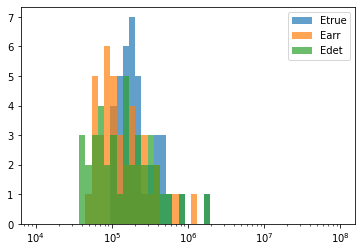

In [9]:
sim.show_spectrum()

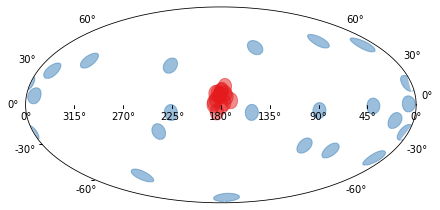

In [10]:
sim.show_skymap()

In [11]:
sim.truth

OrderedDict([('L', 6.2415090744607645e+50),
             ('gamma', 2.2),
             ('F_diff', 8.331240094640408e-08),
             ('f', <Quantity 0.36624602>)])

In [12]:
sim.labels

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0])

In [13]:
# Extract simulated data and get info needed for fit
fit_input = sim.get_data()

In [14]:
fit_input

OrderedDict([('N', 39),
             ('Edet',
              array([ 160494.5938574 ,  301492.05941278,   98365.02946014,
                      124559.60563702,  325742.64786662,  237575.94503549,
                       64972.13486349,   78925.11678329,  563612.79241109,
                       85148.29895773,  142051.42558954, 1883647.18745385,
                      217222.21262399,   40062.79683038,  450155.35016338,
                       70754.4930768 ,   41779.98531686,  161282.21348771,
                      370044.03861468,  352102.90081269,  280037.38660527,
                       85800.17352267,  172962.05588992,  106541.37394527,
                      373861.64327788,   97225.2783876 ,   73633.41710957,
                      139767.65205004,   50460.01545192,  197499.51009756,
                       76965.50518939,   59704.79626241,   51996.36306348,
                       56675.83399277,  240532.578054  ,  787206.48802644,
                       42041.08951639,  142836.1135131

In [15]:
fit_input['source_dir'].ndim


1

# FQTIST FIT

In [16]:
from nu_stats.fqutils import FqStructure

In [80]:
fq = FqStructure(z, Emin,Emax, Esim_gamma = 1.5, n_Esim=10000) # With energy part

/home/vmu/Envs/exj/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/vmu/Envs/exj/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/vmu/Envs/exj/lib/python3.8/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


ValueError: probabilities contain NaN

In [18]:
fq.log_band_likelihood(fit_input,3,2)

-7.759045018989519

In [20]:
n_h, g_h = fq.argmax_band_likelihood(fit_input, np.arange(50), np.linspace(1.6,4))

/home/vmu/nu_stats/nu_stats/fqutils.py:264: RuntimeWarning: invalid value encountered in log
  log_likelihoods = [np.log(


In [81]:
glbl = fq.grid_log_band_likelihood(fit_input, np.arange(fit_input['N']),  np.linspace(1.6,4))

In [82]:
glbl[:,1]

array([-36.15658395, -28.07377361, -23.3227706 , -19.98595776,
       -17.4599966 , -15.46861494, -13.8609087 , -12.54520399,
       -11.46169661, -10.56935962,  -9.83901015,  -9.24935262,
        -8.78458807,  -8.43290503,  -8.1854952 ,  -8.03589714,
        -7.97955472,  -8.01352276,  -8.13627938,  -8.34762064,
        -8.64862416,  -9.04167654,  -9.53056587, -10.12064805,
       -10.8191038 , -11.63531469, -12.58140433, -13.67301808,
       -14.93046134, -16.38039843, -18.05846399, -20.01343233,
       -22.3141977 , -25.06218368, -28.41518081, -32.63813472,
       -38.2284227 , -46.30356184, -60.43086094])

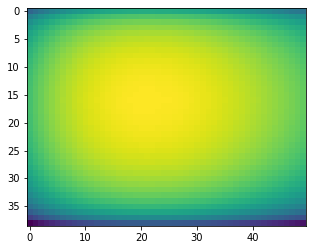

In [83]:
plt.imshow(glbl)

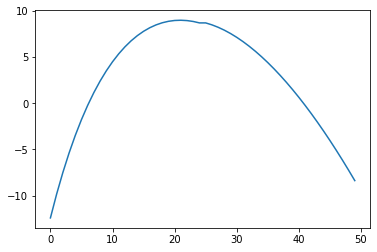

In [84]:
plt.plot(glbl[10,:])

In [75]:
glbl.shape

(39, 50)

In [51]:
l = [fq.energy_likelihood(E*u.GeV,2) for E in np.linspace(1e4,1e8)]

UnitConversionError: Can only apply 'less' function to dimensionless quantities when other argument is not a quantity (unless the latter is all zero/infinity/nan)

In [44]:
glbl[:,1]

array([  -38.72945735,   -30.64664701,   -25.895644  ,   -22.55883116,
         -20.03287   ,   -18.04148834,   -16.43378209,   -15.11807738,
         -14.03457001,   -13.14223302,   -12.41188355,   -11.82222602,
         -11.35746147,   -11.00577843,   -10.7583686 ,   -10.60877054,
         -10.55242812,   -10.58639616,   -10.70915278,   -10.92049403,
         -11.22149756,   -11.61454994,   -12.10343926,   -12.69352145,
         -13.39197719,   -14.20818808,   -15.15427773,   -16.24589147,
         -17.50333474,   -18.95327183,   -20.63133739,   -22.58630573,
         -24.88707109,   -27.63505708,   -30.98805421,   -35.21100812,
         -40.8012961 ,   -48.87643524,   -63.00373434, -5544.9828333 ,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan])

In [93]:
fq_noE = FqStructure() # Only spatial

Marginalized energy likelihood taken to be 1.


In [100]:
fq_noE.log_band_likelihood(fit_input, 39,2)

1.0


(-5506.253375957668,
 [-401.00205236854083,
  -76.75934771035323,
  2.9822288852861774,
  1.2500624700404095,
  1.33152345269142,
  -409.2343704238746,
  -380.15268486022063,
  -367.27068632297824,
  3.2327166550292397,
  -372.22064150808853,
  -63.48902246719627,
  3.438105888648446,
  3.3033286659447496,
  3.9581637056267787,
  2.6087277921561443,
  -256.1048673101354,
  -320.4123349582772,
  3.51419163306034,
  -407.3247011005054,
  3.3110891118418753,
  4.096603609959684,
  -331.0226623168827,
  -190.9796339167444,
  -412.87068825050034,
  3.0744873395377206,
  -81.91771233831786,
  -250.41006616683467,
  0.3628379078412399,
  -404.6162697929279,
  2.016144956947185,
  4.039551572896429,
  -210.43144570574952,
  -24.77534467795135,
  -112.45468547034046,
  3.0593973490281767,
  4.025638261525729,
  -198.9158435486608,
  -286.96731642379785,
  3.4742024231479287])

In [97]:
gridthing = fq_noE.grid_log_band_likelihood(fit_input, np.arange(fit_input['N']+1),  np.linspace(1.5,4))

al 56.80086604581993
energy  1
spacial 4.08116648076724e-92
energy  1
spacial 1.738619391270861e-11
energy  1
spacial 1.4506098966370716e-49
energy  1
spacial 21.314707961157175
energy  1
spacial 56.016050263931035
energy  1
spacial 4.092105140101184e-87
energy  1
spacial 2.3533037700533323e-125
energy  1
spacial 32.272078806257156
energy  1
0.02564102564102564
spacial 7.031070044578041e-175
energy  1
spacial 4.611464342870144e-34
energy  1
spacial 19.73174746979653
energy  1
spacial 3.490561006138121
energy  1
spacial 3.7868080182500794
energy  1
spacial 1.8696965202604655e-178
energy  1
spacial 7.976028268042213e-166
energy  1
spacial 3.135938703028793e-160
energy  1
spacial 25.348426447388057
energy  1
spacial 2.221413171154995e-162
energy  1
spacial 2.6734242373728824e-28
energy  1
spacial 31.12794250558478
energy  1
spacial 27.203038209553775
energy  1
spacial 52.36108724496281
energy  1
spacial 13.581761033121708
energy  1
spacial 5.957572534237114e-112
energy  1
spacial 7.025722

KeyboardInterrupt: 

In [96]:
np.arange(fit_input['N']+1)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

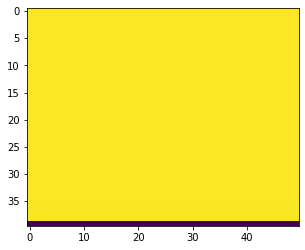

In [90]:
plt.imshow(gridthing)

In [87]:
np.arange(fit_input['N']).max()

38

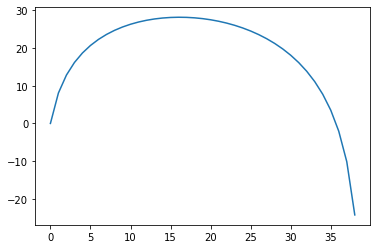

In [71]:
plt.plot(gridthing[:,1])

## Individual associations

In [22]:
bg_sim = Simulation(0*u.erg/u.s, gamma, z, F_diff_norm, Emin, Emax, Enorm, 100000)
bg_sim.run(seed=12345678)
bg_dat = bg_sim.get_data()

Simulated 100000 events


In [23]:
bg_sim.truth

OrderedDict([('L', 0.0),
             ('gamma', 2.2),
             ('F_diff', 8.331240094640408e-08),
             ('f', <Quantity 0.>)])

In [24]:
## get p values
sim_TS, bg_TS, sim_p = fq.event_statistics(fit_input, bg_dat, 2)
## set label 0 for p<.01 and 1 for p>=.01
labels = (sim_p >=.01).astype(int)

/home/vmu/nu_stats/nu_stats/fqutils.py:219: RuntimeWarning: invalid value encountered in double_scalars
  TS[j] = 2*np.log(S / self.bg_likelihood(E_r[j], gamma))


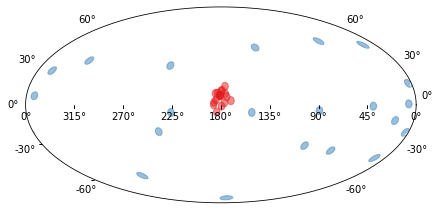

In [25]:
u_v_s(fit_input['det_dir'], labels);

In [26]:
np.mean(labels)

0.5384615384615384

In [27]:
bg_TS.sort()

In [28]:
frac = lambda x: np.mean(bg_TS > x)
y = np.array([frac(elem) for elem in bg_TS])

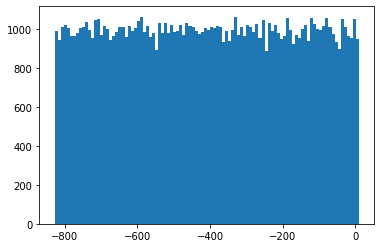

In [29]:
plt.hist(bg_TS,bins=100);

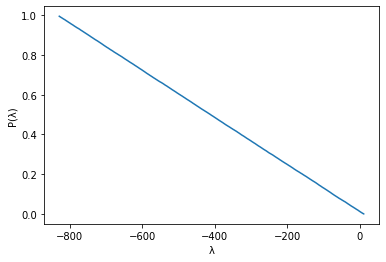

In [30]:

plt.step(bg_TS, y);
plt.xlabel('λ');
plt.ylabel('P(λ)');
#plt.yscale('log');

# BHM

In [31]:
stan_model = CmdStanModel(stan_file="stan/toy_bhm.stan")
fit = stan_model.sample(data=fit_input, iter_sampling=1000, chains=4, seed=42)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/vmu/nu_stats/examples/bayes_hierarchical_model/stan/toy_bhm
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 4


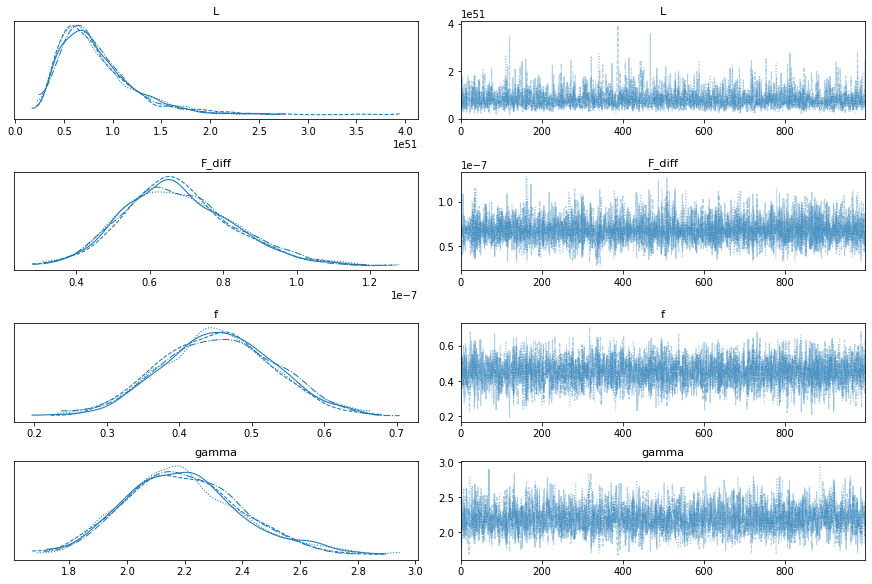

In [32]:
# Trace plot
var_names = ["L", "F_diff", "f", "gamma"]
arviz.plot_trace(fit, var_names=var_names);


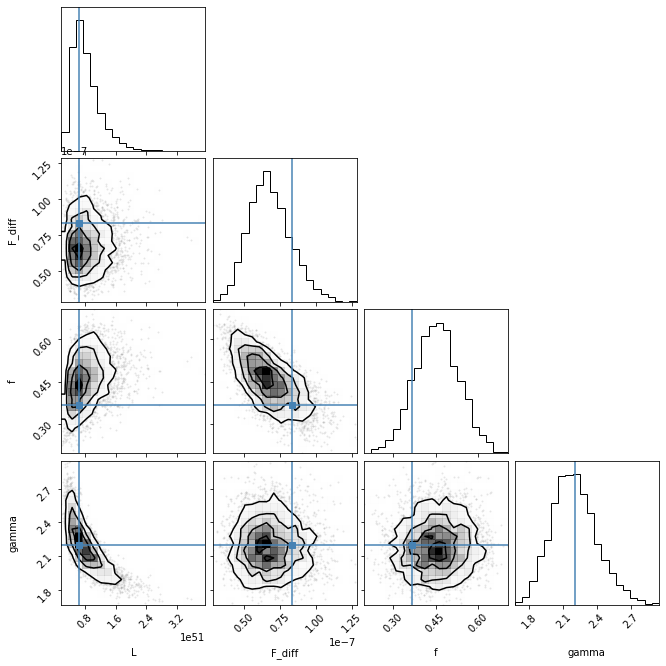

In [33]:
# Corner plot, comparing with truth form sim
variables = fit.stan_variables()
samples = np.column_stack([variables[key] for key in var_names])
truths_list = [sim.truth[key] for key in var_names]

corner.corner(samples, labels=var_names, truths=truths_list);

In [34]:
fit.diagnose()


INFO:cmdstanpy:Processing csv files: /tmp/tmpg3lan1og/toy_bhm-202103121434-1-m23gn0k8.csv, /tmp/tmpg3lan1og/toy_bhm-202103121434-2-a_kogm84.csv, /tmp/tmpg3lan1og/toy_bhm-202103121434-3-iu5gaa7z.csv, /tmp/tmpg3lan1og/toy_bhm-202103121434-4-dv3yb3mt.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


'Processing csv files: /tmp/tmpg3lan1og/toy_bhm-202103121434-1-m23gn0k8.csv, /tmp/tmpg3lan1og/toy_bhm-202103121434-2-a_kogm84.csv, /tmp/tmpg3lan1og/toy_bhm-202103121434-3-iu5gaa7z.csv, /tmp/tmpg3lan1og/toy_bhm-202103121434-4-dv3yb3mt.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory for all transitions.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete, no problems detected.'

In [35]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-1.300000e+03,1.500000e-01,5.200000e+00,-1.300000e+03,-1.300000e+03,-1.300000e+03,1200.0,130.0,1.0
gamma,2.200000e+00,3.700000e-03,2.000000e-01,1.900000e+00,2.200000e+00,2.600000e+00,3000.0,320.0,1.0
L,8.300000e+50,6.700000e+48,3.900000e+50,3.800000e+50,7.400000e+50,1.600000e+51,3300.0,350.0,1.0
F_diff,6.800000e-08,1.800000e-10,1.500000e-08,4.600000e-08,6.700000e-08,9.500000e-08,7200.0,770.0,1.0
Etrue[1],2.794860e+05,1.727000e+03,1.507500e+05,1.184070e+05,2.400630e+05,5.665850e+05,7620.0,810.0,1.0
...,...,...,...,...,...,...,...,...,...
Earr[35],1.369320e+05,8.540000e+02,6.975300e+04,5.940800e+04,1.219760e+05,2.676050e+05,6677.0,710.0,1.0
Earr[36],4.280910e+05,2.945000e+03,2.325340e+05,1.615230e+05,3.749640e+05,8.722440e+05,6237.0,663.0,1.0
Earr[37],6.744800e+04,2.500000e+02,1.859600e+04,5.085200e+04,6.167200e+04,1.033560e+05,5517.0,586.0,1.0


In [36]:
fit.stan_variable('log_prob').shape

(4000, 39, 2)

## Individual associations


In [37]:
import nu_stats.bhmutils as bhm

In [38]:
association = bhm.classify_events(fit_input, fit)

In [39]:
labels_b = (association[:,0] <.01).astype(int)

In [40]:
labels_b

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0])

In [41]:
labels_b.mean()

0.5384615384615384

In [42]:
u_v_s(fit_input['det_dir'], labels_b);

NameError: name 'det_dir' is not defined